In [ ]:
## By Pratik Patil
## Intern at GRIP: The Sparks Foundation

In [ ]:
## Domain : Computer Vision & Internet of Things.
## Task 1 : Object Detection / Optical Character Recognisation (ORC).
## Level : Beginner.

In [ ]:
## Solution :-
# a. Imported libraries such as cv2 and matplotlb.
# b. Read pretrained models from OpenCV Repository on Github.
# c. Read data set from coco dataset which is already downloaded from OpenCV Repository.
# d. Imported video labled as "car.jpg" from machine.
# e. Displaying the detected box for an image and class name for the same.

[[1]
 [3]]


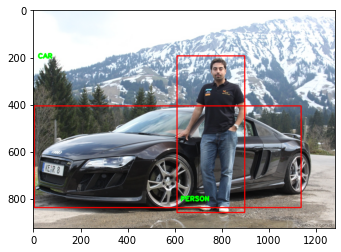

In [18]:
# importing the directories
import cv2
import matplotlib.pylab as plt

# Reading pretrained models from laptop.
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"
model = cv2.dnn_DetectionModel(frozen_model, config_file)

# Reading data set from coco dataset which is already downloaded.
classNames = []
data = "coco.names.txt"
with open(data,"rt") as p:
    classNames = p.read().rstrip('\n').split(('\n'))

# We are loading the model of equation and assigning value for input size; precision scale,
# Setting the color scale and  converting it to BGR scale.
model.setInputSize(320,320)                         # Size of input model as in config model its 320*320.
model.setInputScale(1.0 / 127.5)                    # Value of white color is 255, so gray = 127.5
model.setInputMean((127.5,127.5,127.5))             # Setting mean of every color in BGR (0-255).
model.setInputSwapRB(True)                          # As for normal images its RGB and we want BGR hence swap.

img = cv2.imread('car.jpg')

# Detecting box for an image.
classIndex, confidance, bbox = model.detect(img, confThreshold=0.5)
print(classIndex)

# Formatting the detected box and display with image.
fontScale = 2
font = cv2.FONT_HERSHEY_PLAIN

for classInd, conf, box in zip(classIndex.flatten(), confidance.flatten(),bbox) :
    cv2.rectangle(img,box,(0,0,255),3)
    cv2.putText(img, classNames[classInd-1].upper(),(box[0]+15, box[0]+200),font,fontScale,(0,255,0),5)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))